In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import shapiro,wilcoxon,ttest_1samp,ttest_ind,ttest_rel,skew
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency,chisquare

## Annova Test

### METHOD 1 FOR ANOVA

In [4]:
D=[43,45,45,47] 
E=[37,40,40,43]
F=[34,35,35,36]
A=[30,40,50,60] 
B=[25,30,50,55]
C=[25,30,40,45]


In [5]:
Abar=np.mean(A)
Bbar=np.mean(B)
Cbar=np.mean(C)

In [14]:
Dbar=np.mean(D)
Dvar=np.var(D,ddof=1) #will be used in denominator part
Ebar=np.mean(E)
Evar=np.var(E,ddof=1)
Fbar=np.mean(F)
Fvar=np.var(F,ddof=1)


In [10]:
oa=(np.sum(A)+np.sum(B)+np.sum(C))/12
oa
#overall average (a) global average for ABC

40.0

In [11]:
oa=(np.sum(D)+np.sum(E)+np.sum(F))/12
oa

#overall average (a) global average for DEF

40.0

In [12]:
sstr=len(A)*(Abar-oa)**2+len(B)*(Bbar-oa)**2+len(C)*(Cbar-oa)**2
sstr
#sum sqr tretament - numerator part of mstr for ABC

#Formula is similar to left top side one we saw in earlier pictures

200.0

In [15]:
sstr=len(D)*(Dbar-oa)**2+len(E)*(Ebar-oa)**2+len(F)*(Fbar-oa)**2
sstr
#sum sqr tretament - numerator part of mstr for DEF

200.0

In [28]:
Numerator part of ABc and DEf are same i.e 200 . This is because theyre sharing same mean

In [ ]:
#Between Sample Vatiability (MSTR) =sstr/degrees of freedom

In [16]:
ddof=3-1 #3 groups -1 
mstr=sstr/ddof
mstr

100.0

In [ ]:
#Only numerator part is completed as of now.

#It's 100 for both ABC and DEF

In [17]:
Avar=np.var(A,ddof=1)
Bvar=np.var(B,ddof=1)
Cvar=np.var(C,ddof=1)

#DEF already done earlier itself

In [23]:
#Within Sample Variability (MSE)=SSE/dof    (pink data points) for DEF group
sse=(len(D)-1)*Dvar+(len(E)-1)*Evar+(len(F)-1)*Fvar
df2=12-3

mse=sse/df2  #28/9

print(sse)
print(mse)

#Values are tightly packed in this DEF so which means Num should be large and denominator should be small.
#So we are also getting similar value

28.0
3.111111111111111


In [24]:
#Calcualting the Fstat value or Anova for DEF

Fstat_DEF=100/3.111111111111111111111 #mstr=100 , mse=3.1111
Fstat_DEF

32.14285714285714

In [25]:
#Within Sample Variability (MSE)=SSE/dof               (Red data points) for ABC group
sse=(len(A)-1)*Avar+(len(B)-1)*Bvar+(len(C)-1)*Cvar
df2=12-3

mse=sse/df2 #1400/9

print(sse)
print(mse)

1400.0
155.55555555555554


In [28]:
#Calcualting the Fstat value or Anova for ABC

Fstat_ABC=100/155.5555
Fstat_ABC

0.6428573724490616

### METHOD 2 FOR ANOVA

In [ ]:
In the above methods we dont get the ovalues in manual calculations. so using this we can see the pvalue even with the
manual calculations part.

In [29]:
#for ABC group

G1_df=pd.DataFrame()
df1=pd.DataFrame({'group':'A','age':[30,40,50,60]})
df2=pd.DataFrame({'group':'B','age':[25,30,50,55]})
df3=pd.DataFrame({'group':'C','age':[25,30,40,45]})
G1_df=G1_df.append(df1)
G1_df=G1_df.append(df2)
G1_df=G1_df.append(df3)


In [33]:
#ANOVA is also called as Regressor analysis

import statsmodels.api         as     sm #statsmodel
from   statsmodels.formula.api import ols #ols - ordinary least square. usually used in Regressor Analysis.
 
m1 = ols('age ~ group', data = G1_df).fit()  #fit will do all the manual calculations we did
#formula : 'age ~ group' tilde ~ represent regressor function. Univariate / 1 variable Anova analysis.
#left hand side should be continous variable(Age), Regress(~), Categorical(ABC)
aov_table = sm.stats.anova_lm(m1, typ=1)
#sm is used here to create the anova table and typ=1 is default display model which 2,3.. can be used also
print(aov_table)

#Inference form the table

#First Row is MSTR calculation
#First row :
#sum_sq = 200 which was numerator in the manual calculation
#df = 2 (3-1) which was denominator in the manual calculation
#mean_sq = 200/2 = 100

#Second row is MSE calculation
#sum_sq = 1400 which was numerator in the manual calculation
#df = 9 which was denominator in the manual calculation
#mean_sq = 1400/9 = 155.55555

#F is actually the Fstat value. (MSTR/MSE)=> (100/155.555)
#PR is pvalue. Thorugh this method we get the pvalue. Higher pvalue so Null hypo Ho holds good.

           df  sum_sq     mean_sq         F    PR(>F)
group     2.0   200.0  100.000000  0.642857  0.548323
Residual  9.0  1400.0  155.555556       NaN       NaN


In [34]:
G2_df=pd.DataFrame()
Df1=pd.DataFrame({'group':'D','age':[43,45,45,47]})
Df2=pd.DataFrame({'group':'E','age':[37,40,40,43]})
Df3=pd.DataFrame({'group':'F','age':[34,35,35,36]})
G2_df=G2_df.append(Df1)
G2_df=G2_df.append(Df2)
G2_df=G2_df.append(Df3)


In [35]:
#DEF
m1 = ols('age ~ group', data = G2_df).fit()
aov_table = sm.stats.anova_lm(m1, typ=1)
print(aov_table)

#Inference - Explanation is same as above
#But pvalue is very low so rejects Nulll hypothesis and Ha holds good.

           df  sum_sq     mean_sq          F   PR(>F)
group     2.0   200.0  100.000000  32.142857  0.00008
Residual  9.0    28.0    3.111111        NaN      NaN


### METHOD 3 FOR ANOVA

In [36]:
from scipy.stats import f_oneway

In [37]:
f_oneway(A,B,C)

F_onewayResult(statistic=0.6428571428571429, pvalue=0.5483227164089495)

In [38]:
f_oneway(D,E,F)

#can see values are same as ols method

F_onewayResult(statistic=32.14285714285714, pvalue=7.970844367886858e-05)

In [ ]:
NOTE : If Fstats is larger then naturally pvalue will be smaller. Using this concept we can reject the Null Hypo

In [ ]:
In class : See this link for detailed explanation
http://localhost:8888/notebooks/Great%20Lakes-%20STATS/ANOVA_class_and_Labwork.ipynb

### Analysis of variance (ANOVA)¶
ANOVA is a hypothesis testing technique tests the equality of two or more population means by examining the variances of samples that are taken.

ANOVA tests the general rather than specific differences among means.

### Example-1 Load the fair_pay_data and check 1. Is there any significant difference in average salary with respect to department.2. Is there any significant difference in average salary with respect to designation.

### 1-Way ANOVA 

In [39]:
A=pd.read_csv('fair_pay_data.csv')
A.head()

,employee_id,department,salary,new_hire,job_level
0,1,Sales,103263.63550,No,Salaried
1,2,Engineering,80708.64104,No,Hourly
2,4,Engineering,60737.04786,Yes,Hourly
3,5,Engineering,99116.32328,Yes,Salaried
4,7,Engineering,51021.64386,No,Hourly


In [40]:
A['department'].value_counts()

Engineering    961
Sales          446
Finance         63
Name: department, dtype: int64

In [42]:
g1=A['salary'][A['department']=='Engineering']
g2=A['salary'][A['department']=='Sales']
g3=A['salary'][A['department']=='Finance']

In [43]:
from scipy.stats import f_oneway

In [45]:
f_oneway(g1,g2,g3)

#pvalue>0.05 so we accept the Null hypothesis.
#Inference : So Average salary is same across all departments

F_onewayResult(statistic=1.5095348803367656, pvalue=0.22135584696393226)

In [46]:
np.mean(g1),np.mean(g2),np.mean(g3)

(73560.73841627462, 75039.9375778251, 76651.66425492064)

In [47]:
A['job_level'].value_counts()

Hourly      1039
Salaried     326
Manager      105
Name: job_level, dtype: int64

In [48]:
g1=A['salary'][A['job_level']=='Hourly']
g2=A['salary'][A['job_level']=='Salaried']
g3=A['salary'][A['job_level']=='Manager']

In [49]:
f_oneway(g1,g2,g3)

F_onewayResult(statistic=2564.3512004718987, pvalue=0.0)

In [50]:
np.mean(g1),np.mean(g2),np.mean(g3)

(64251.24077572664, 91143.073100092, 119229.1012304762)

### Example 2

Consider the monthly income of members from three different gyms - fitness centers given below:
* Gym 1 (n = 22): [60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73]
* Gym 2 (n = 18): [56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64]
* Gym 3 (n = 23): [67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45]  

Using ANOVA, test whether the mean monthly income is equal for each Gym.


In [52]:
Gym_1 = np.array([60, 66, 65, 55, 62, 70, 51, 72, 58, 61, 71, 41, 70, 57, 55, 63, 64, 76, 74, 54, 58, 73])
Gym_2 = np.array([56, 65, 65, 63, 57, 47, 72, 56, 52, 75, 66, 62, 68, 75, 60, 73, 63, 64])
Gym_3 = np.array([67, 56, 65, 61, 63, 59, 42, 53, 63, 65, 60, 57, 62, 70, 73, 63, 55, 52, 58, 68, 70, 72, 45])  

print('Count, Mean and standard deviation of monthly income of members of Gym 1: %3d, %3.2f and %3.2f' % (len(Gym_1), Gym_1.mean(),np.std(Gym_1,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 2: %3d, %3.2f and %3.2f' % (len(Gym_2), Gym_2.mean(),np.std(Gym_2,ddof =1)))
print('Count, Mean and standard deviation of monthly income of members of Gym 3: %3d, %3.2f and %3.2f' % (len(Gym_3), Gym_3.mean(),np.std(Gym_3,ddof =1)))

Count, Mean and standard deviation of monthly income of members of Gym 1:  22, 62.55 and 8.67
Count, Mean and standard deviation of monthly income of members of Gym 2:  18, 63.28 and 7.79
Count, Mean and standard deviation of monthly income of members of Gym 3:  23, 60.83 and 8.00


In [53]:
monthly_inc_df = pd.DataFrame()

df1            = pd.DataFrame({'Gym': '1', 'Monthly_inc':Gym_1})
df2            = pd.DataFrame({'Gym': '2', 'Monthly_inc':Gym_2})
df3            = pd.DataFrame({'Gym': '3', 'Monthly_inc':Gym_3})

monthly_inc_df = monthly_inc_df.append(df1) 
monthly_inc_df = monthly_inc_df.append(df2) 
monthly_inc_df = monthly_inc_df.append(df3) 

In [54]:
monthly_inc_df

,Gym,Monthly_inc
0,1,60
1,1,66
2,1,65
3,1,55
4,1,62
...,...,...
18,3,58
19,3,68
20,3,70
21,3,72


### Let us explore the data graphically

### A side by side boxplot is one of the best way to compare group locations, spreads and shapes.

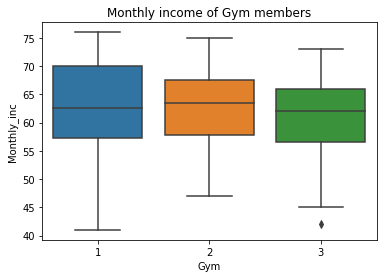

In [55]:
sns.boxplot(x = "Gym", y = "Monthly_inc", data = monthly_inc_df)
plt.title('Monthly income of Gym members')
plt.show()

#We can see that Means are almost closer and there is no big deviations in it.

### The null and alternative hypothesis:

* $H_0$: $\mu1$ = $\mu2$ = $\mu3$
* $H_A$: At least one $\mu$ differs 

In [56]:
import scipy.stats             as     stats

In [58]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Monthly_inc ~ Gym', data = monthly_inc_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

#here also we can do for multiple columns. which we will see in Two way Anova or multi way Anova

               sum_sq    df         F   PR(>F)
Gym         66.614123   2.0  0.497075  0.61079
Residual  4020.370004  60.0       NaN      NaN


In [63]:
df1=monthly_inc_df[monthly_inc_df['Gym']=='1']
df2=monthly_inc_df[monthly_inc_df['Gym']=='2']
df3=monthly_inc_df[monthly_inc_df['Gym']=='3']

#This consist of two columns that why in f_oneway output getting two values

In [64]:
f_oneway(df1,df2,df3)

F_onewayResult(statistic=array([4.63692850e+13, 4.97074567e-01]), pvalue=array([0.        , 0.61079039]))

In [ ]:
#Inference - pvalue>0.05 so we accept the Null hypothesis.Ho holds good

In [68]:
df1=monthly_inc_df[monthly_inc_df['Gym']=='1']['Monthly_inc']
df2=monthly_inc_df[monthly_inc_df['Gym']=='2']['Monthly_inc']
df3=monthly_inc_df[monthly_inc_df['Gym']=='3']['Monthly_inc']

#Question is for Monthly income so we can filter out only that

In [69]:
f_oneway(df1,df2,df3)

#getting same values.

F_onewayResult(statistic=0.4970745666663714, pvalue=0.6107903864000767)

## Two-way ANOVA

In [91]:
table1  = [['Loc','Dis0','Dis10','Dis20'], [ 1, 20, 28, 32], [ 2, 20, 19, 20],
  [ 1, 16, 23, 29 ],[ 2, 21, 27, 31 ],[ 1, 24, 25, 28 ],[ 2, 23, 23, 35 ],
  [ 1, 20, 31, 27 ],[ 2, 19, 30, 25 ],[ 1, 19, 25, 30 ],[ 2, 25, 25, 31 ],
  [ 1, 10, 24, 26 ],[ 2, 22, 21, 31 ],[ 1, 24, 28, 37 ],[ 2, 25, 33, 31 ],
  [ 1, 16, 23, 33 ],[ 2, 21, 26, 23 ],[ 1, 25, 26, 27 ],[ 2, 26, 22, 22 ],
  [ 1, 16, 25, 31 ],[ 2, 22, 28, 32 ],[ 1, 18, 22, 37 ],[ 2, 25, 24, 22 ],
  [ 1, 20, 24, 28 ],[ 2, 23, 23, 29 ],[ 1, 17, 26, 25 ],[ 2, 23, 26, 25 ],
  [ 1, 26, 28, 23 ],[ 2, 24, 16, 34 ],[ 1, 16, 21, 26 ],[ 2, 20, 30, 30 ],
  [ 1, 21, 27, 33 ],[2, 23, 22, 25 ],[ 1, 24, 25, 28 ],[ 2, 18, 16, 39 ],
  [ 1, 19, 20, 30 ],[ 2, 19, 25, 32 ],[ 1, 19, 26, 30 ],[ 2, 19, 34, 29 ],
  [ 1, 21, 26, 26 ],[ 2, 30, 23, 22 ]]
headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

#Loc=1 Represent Store 1 , Loc=2 Represent Store 2

    Loc  Dis0  Dis10  Dis20
0     1    20     28     32
1     2    20     19     20
2     1    16     23     29
3     2    21     27     31
4     1    24     25     28
5     2    23     23     35
6     1    20     31     27
7     2    19     30     25
8     1    19     25     30
9     2    25     25     31
10    1    10     24     26
11    2    22     21     31
12    1    24     28     37
13    2    25     33     31
14    1    16     23     33
15    2    21     26     23
16    1    25     26     27
17    2    26     22     22
18    1    16     25     31
19    2    22     28     32
20    1    18     22     37
21    2    25     24     22
22    1    20     24     28
23    2    23     23     29
24    1    17     26     25
25    2    23     26     25
26    1    26     28     23
27    2    24     16     34
28    1    16     21     26
29    2    20     30     30
30    1    21     27     33
31    2    23     22     25
32    1    24     25     28
33    2    18     16     39
34    1    19     20

Conduct a two-way ANOVA at $\alpha$ = 5% to test the effects of discounts and location on sales.

### The null and alternative hypothesis:

The null hypotheses for each of the sets are given below.

1) The population means of the first factor (Discount) are equal.
2) The population means of the second factor (Location) are equal.
3) There is no interaction between the two factors - Discount and Location.


Alternative Hypothesis:

1) The population means of the first factor (Discount) are not equal.
2) The population means of the second factor (Location) are not equal.
3) There is an interaction between the two factors - Discount and Location.

In [92]:
d0_val  = df1['Dis0'].values
d10_val = df1['Dis10'].values
d20_val = df1['Dis20'].values
l_val   = df1['Loc'].values

df1   = pd.DataFrame({'Loc': l_val, 'Discount':'0','Qty': d0_val})
df2   = pd.DataFrame({'Loc': l_val, 'Discount':'10','Qty': d10_val})
df3   = pd.DataFrame({'Loc': l_val, 'Discount':'20','Qty': d20_val})

Sale_qty_df = pd.DataFrame()

Sale_qty_df = Sale_qty_df.append(df1) 
Sale_qty_df = Sale_qty_df.append(df2) 
Sale_qty_df = Sale_qty_df.append(df3) 

pd.DataFrame(Sale_qty_df)

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
...,...,...,...
35,2,20,32
36,1,20,30
37,2,20,29
38,1,20,26


In [93]:
Sale_qty_df

,Loc,Discount,Qty
0,1,0,20
1,2,0,20
2,1,0,16
3,2,0,21
4,1,0,24
...,...,...,...
35,2,20,32
36,1,20,30
37,2,20,29
38,1,20,26


In [94]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm


In [1]:
formula = 'Qty ~ C(Discount) + C(Loc) + C(Discount):C(Loc)'
#C means categorical  C(Discount):C(Loc)- relationship study
#Need to be categorical then only we can see the relationship . Thats why changing the Numerical(discount) into categorical

model = ols(formula, data=Sale_qty_df).fit()
aov_table = anova_lm(model, typ=2)

print(aov_table)

In [ ]:
Op would be like 

                         sum_sq     df          F        PR(>F)
C(Discount)         1240.316667    2.0  39.279968  1.055160e-13
C(Loc)                 7.008333    1.0   0.443898  5.065930e-01
C(Discount):C(Loc)    84.816667    2.0   2.686085  7.246036e-02
Residual            1799.850000  114.0        NaN           NaN

In [99]:
#Second Example

In [100]:
df=pd.read_table('HR.txt',index_col=0)

In [101]:
df

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Individual,,,,,,,,,,,,,,,,,,,,,
Ind1,Yes,41,1,1102,1,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
Ind2,No,49,2,279,2,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
Ind3,Yes,37,1,1373,2,2,2,6,1,4,...,2,80,0,7,3,3,0,0,0,0
Ind4,No,33,2,1392,2,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
Ind5,No,27,1,591,2,2,1,2,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Ind1466,No,36,2,884,2,23,2,2,1,2061,...,3,80,1,17,3,3,5,2,0,3
Ind1467,No,39,1,613,2,6,1,2,1,2062,...,1,80,1,9,5,3,7,7,1,7
Ind1468,No,27,1,155,2,4,3,1,1,2064,...,2,80,1,6,0,3,6,2,0,3


In [53]:
df.columns

Index(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [110]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
from   statsmodels.stats.anova import anova_lm

formula='MonthlyIncome ~ C(Department)+C(Gender)+C(Department):C(Gender)'

model=ols(formula,df).fit()
aov_table=anova_lm(model,typ=2)
aov_table

#again getting the Error so its better to refer the below one.

In [109]:
#Post hoc analysis for Department to find which has higher salary.

g1=df['MonthlyIncome'][df['Department']==1]
g2=df['MonthlyIncome'][df['Department']==2]
g3=df['MonthlyIncome'][df['Department']==3]


In [111]:
g1.describe()

count      446.000000
mean      6959.172646
std       4058.739322
min       1052.000000
25%       4446.250000
50%       5754.500000
75%       8776.750000
max      19847.000000
Name: MonthlyIncome, dtype: float64

In [112]:
g2.describe()

count      961.000000
mean      6281.252862
std       4895.835087
min       1009.000000
25%       2741.000000
50%       4374.000000
75%       7655.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [113]:
g3.describe()

count       63.000000
mean      6654.507937
std       5788.732921
min       1555.000000
25%       2644.000000
50%       3886.000000
75%       8412.500000
max      19717.000000
Name: MonthlyIncome, dtype: float64